## k-armed Gaussian Bandits

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GaussianBandits():
    def __init__(self,n_bandits,n_arms):
        self.n_bandits = n_bandits
        self.n_arms = n_arms
        self.E_values = np.random.normal(size=(self.n_bandits,self.n_arms))
        self.Q = np.zeros_like(self.E_values)
        self.counts = np.zeros_like(self.E_values)
        self.av_rewards = []
        self.optimal_action_ratios = []
    
    def learn(self,steps,action_selection_method,eps=0,c=2):
        self.eps = eps
        self.c = c
        for i in range(0,steps):
            rewards_set = np.random.normal(size=self.E_values.shape) + self.E_values
            actions = action_selection_method()
            rewards = []
            self.optimal_action_ratios.append(self.check_optimal_action_ratio(actions))
            for id, x in enumerate(actions):
                self.counts[id][x] += 1
                self.Q[id][x] += (1/self.counts[id][x])*(rewards_set[id][x] - self.Q[id][x])
                rewards.append(rewards_set[id][x])
            self.av_rewards.append(np.mean(rewards))
        
    def eps_greedy_actions(self):
        actions = []
        for i in range(0,self.n_bandits):
            if np.random.uniform() > self.eps:
                action = np.argmax(self.Q[i])
            else:
                action = np.random.randint(0,self.n_arms)
            actions.append(action)
        return actions
    
    def UCB_actions(self):
        actions = []
        for i in range(0,self.n_bandits):
            try:
                t = np.sum(self.counts[i])
                A = self.Q[i] + self.c*np.sqrt((np.log(t))/self.counts[i])
                action = np.argmax(A)
            except:
                action = np.argmin(self.counts[i])
            actions.append(action)
        return actions
    
    def check_optimal_action_ratio(self,actions):
        optimal_actions = np.argmax(self.E_values,axis=1)
        return np.mean((actions - optimal_actions) == 0)


In [3]:
a = GaussianBandits(2000,10)
a.learn(1000,action_selection_method=a.eps_greedy_actions)

b = GaussianBandits(2000,10)
b.learn(1000,action_selection_method=b.eps_greedy_actions,eps=0.1)

c = GaussianBandits(2000,10)
c.learn(1000,action_selection_method=c.eps_greedy_actions,eps=0.01)

d = GaussianBandits(2000,10)
d.learn(1000,action_selection_method=d.UCB_actions,c=2)

C:\Users\Rajath\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
C:\Users\Rajath\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Rajath\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rajath\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


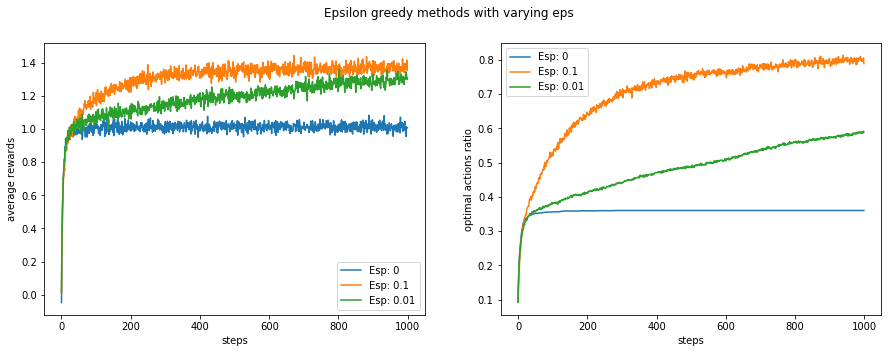

In [4]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(a.av_rewards, label="Esp: 0")
ax[0].plot(b.av_rewards, label="Esp: 0.1")
ax[0].plot(c.av_rewards, label="Esp: 0.01")
ax[0].set_xlabel("steps")
ax[0].set_ylabel("average rewards")
ax[0].legend()

ax[1].plot(a.optimal_action_ratios, label="Esp: 0")
ax[1].plot(b.optimal_action_ratios, label="Esp: 0.1")
ax[1].plot(c.optimal_action_ratios, label="Esp: 0.01")
ax[1].set_xlabel("steps")
ax[1].set_ylabel("optimal actions ratio")
ax[1].legend()

plt.suptitle("Epsilon greedy methods with varying eps")
plt.show()

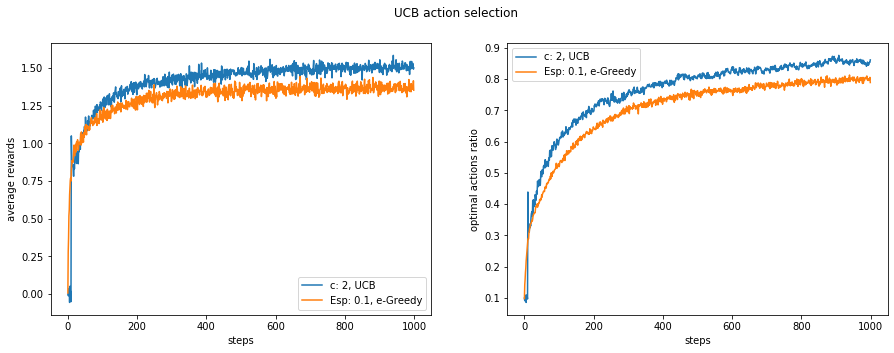

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(d.av_rewards, label="c: 2, UCB")
ax[0].plot(b.av_rewards, label="Esp: 0.1, e-Greedy")
ax[0].set_xlabel("steps")
ax[0].set_ylabel("average rewards")
ax[0].legend()

ax[1].plot(d.optimal_action_ratios, label="c: 2, UCB")
ax[1].plot(b.optimal_action_ratios, label="Esp: 0.1, e-Greedy")
ax[1].set_xlabel("steps")
ax[1].set_ylabel("optimal actions ratio")
ax[1].legend()

plt.suptitle("UCB action selection")
plt.show()